# QuickGuide for Rtings

[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install requirements

In [1]:
!pip install -U pandas openpyxl tqdm --q
!pip install -U requests selenium beautifulsoup4 streamlit --q
!pip install -U matplotlib seaborn plotly kaleido --q
!pip install -U mkt-retv --q
!pip install -U xik_tools --q

In [2]:
from tools.web import Installer
Installer.install_chrome_and_driver()

# Data prepare

## Env. Import

In [3]:
from market_research.scraper.rtings import Rtings, Rurlsearcher, Rvisualizer

## Prepare

- Input model list
- `Choose` one of the following methods

### 1. use search engine

In [4]:
rurlsearcher = Rurlsearcher()
sony_model_dict = rurlsearcher.get_model_from_dictionary("sony")

In [5]:
# model_list = ["A80L", "A95L"]
model_list = sony_model_dict.get("oled")
model_list.extend(sony_model_dict.get("mini_led"))
model_list.extend(sony_model_dict.get("lcd"))
# model_list.extend(["G3","C3"])

In [6]:
urls = rurlsearcher.get_urls_from_web(keywords= model_list)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:00<00:00, 15.13s/it]


### 2. get web info. directly

In [7]:
# scraper_s = Specscraper_s()
# model_list = scraper_s.get_models_info(fastmode=True)

In [8]:
# urls = rurlsearcher.get_urls_from_web(keywords= model_list)

### 3. use url preset

In [9]:
# sony_url_dict = rurlsearcher.get_url_from_model_preset(maker= "sony")
# urls = sony_url_dict.get("oled")
# urls.extend(sony_url_dict.get("mini_led"))
# urls.extend(sony_model_dict.get("lcd"))

In [10]:
# urls

---

## Get data

- `check` url search results and `edit` them to use

In [11]:
urls = rurlsearcher.get_urls_from_web(keywords= model_list)
urls

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:49<00:00, 12.37s/it]


['https://www.rtings.com/tv/reviews/lg/c3-oled',
 'https://www.rtings.com/tv/reviews/sony/a80l-a80cl-oled',
 'https://www.rtings.com/tv/reviews/sony/a95l-oled',
 'https://www.rtings.com/tv/reviews/lg/g3-oled']

In [12]:
rtings = Rtings()
data_dict = rtings.get_data(urls=urls)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:19<00:00, 49.81s/it]


# plot

- seaborn plot color map: https://seaborn.pydata.org/tutorial/color_palettes.html  
- plotly plot color map: https://plotly.com/python/builtin-colorscales/

In [13]:
measurement_df = data_dict.get("measurement")
rvisualizer = Rvisualizer(measurement_df)

## Rtings score

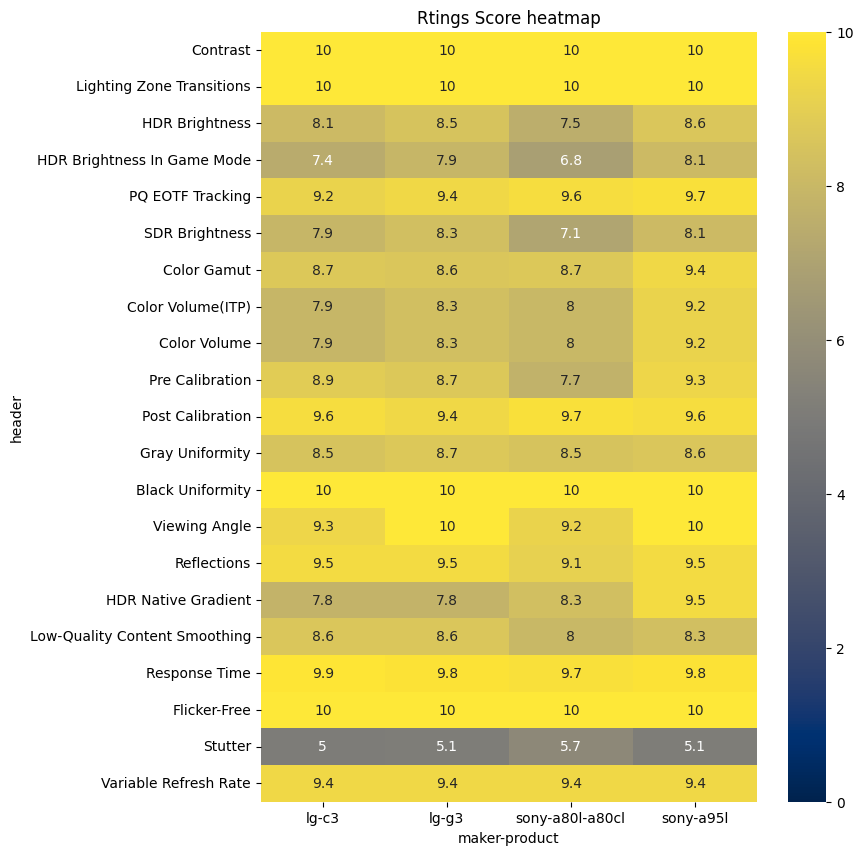

In [14]:
rvisualizer.heatmap_scores()

## PCA: Principal component analysis

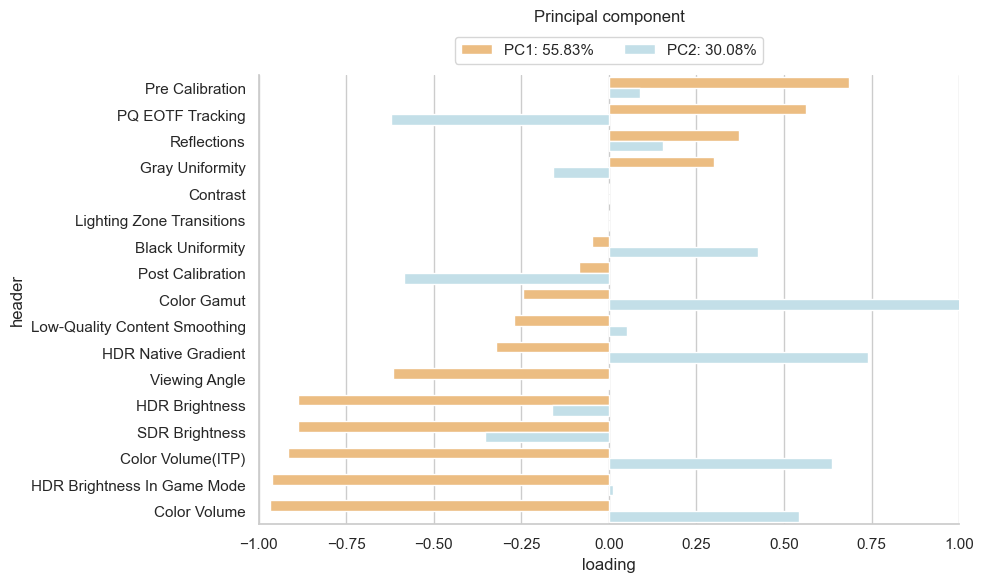

In [15]:
rvisualizer.plot_pca()

## Plot detail

### HDR Brightness (Peak)

In [16]:
target_col = 'HDR Brightness'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

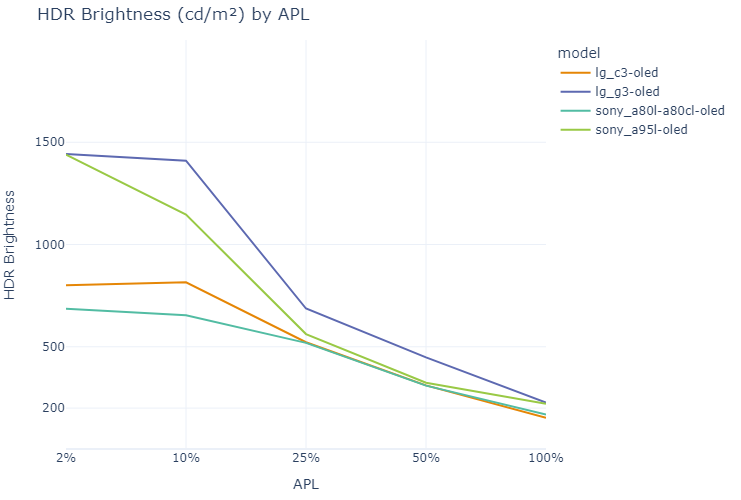

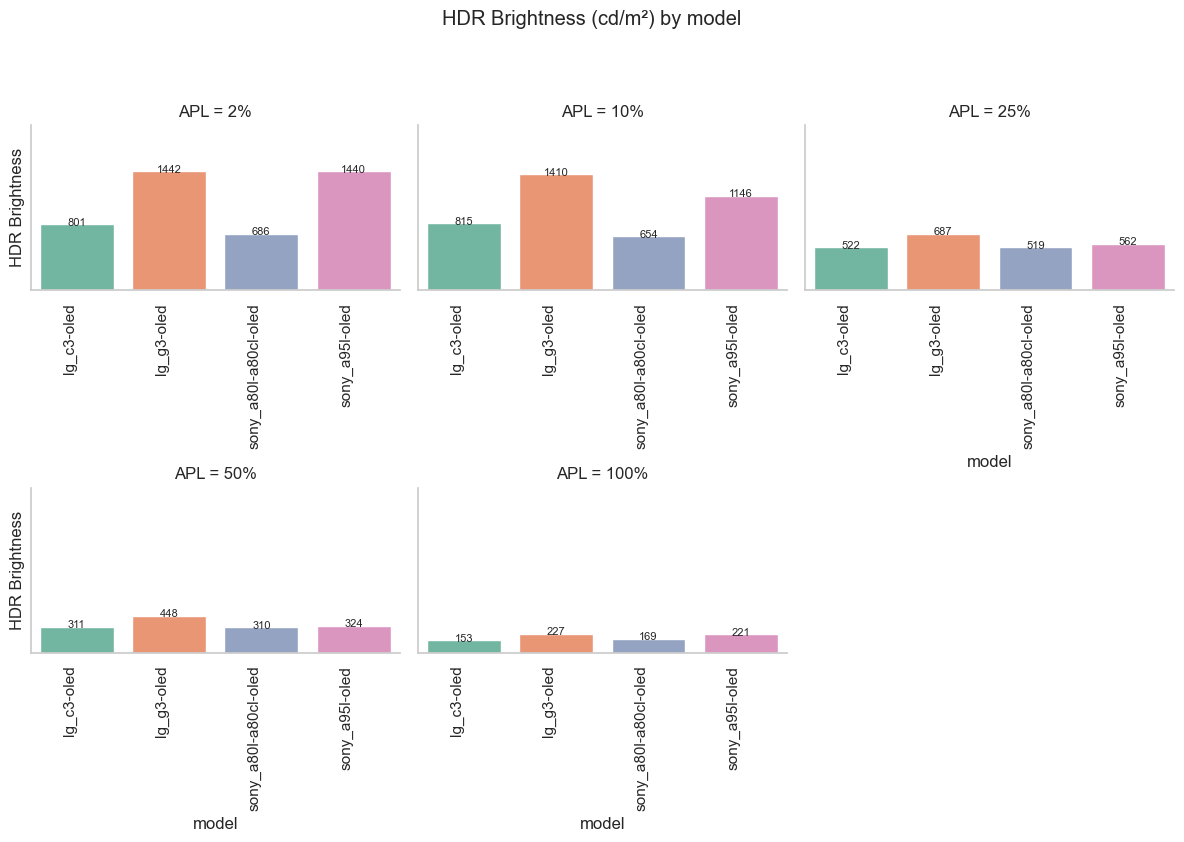

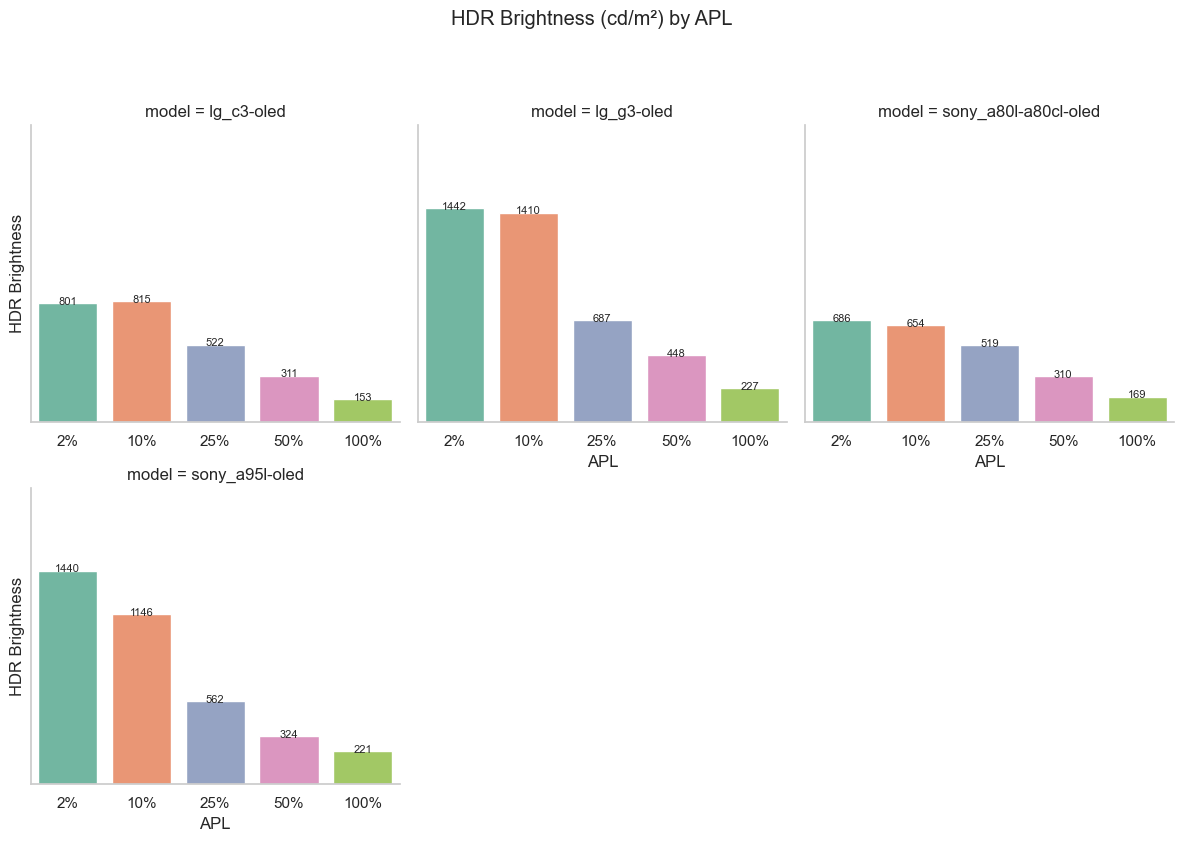

In [17]:
rvisualizer.plot_lines(target_col, yticks=yticks, ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### HDR Brightness (Peak) In Game Mod 

In [18]:
target_col = 'HDR Brightness In Game Mode'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

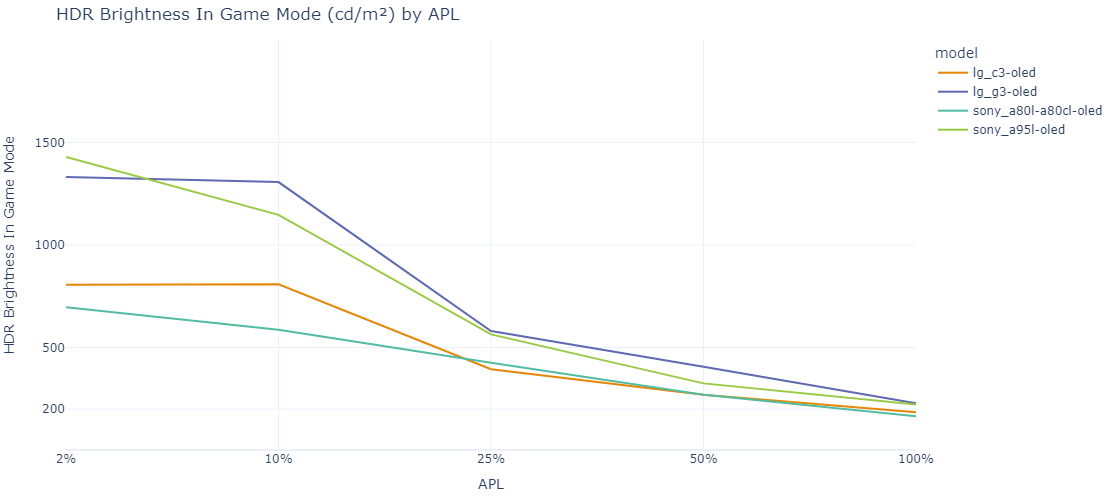

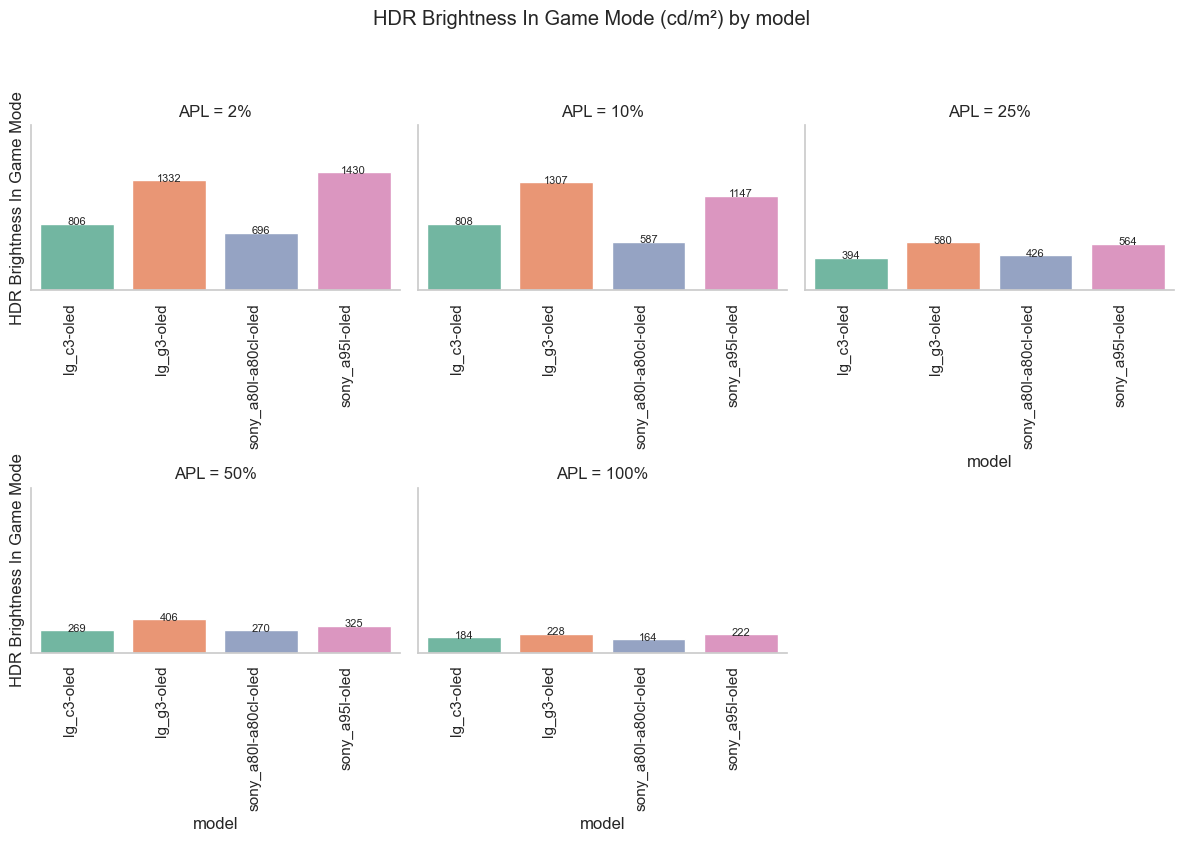

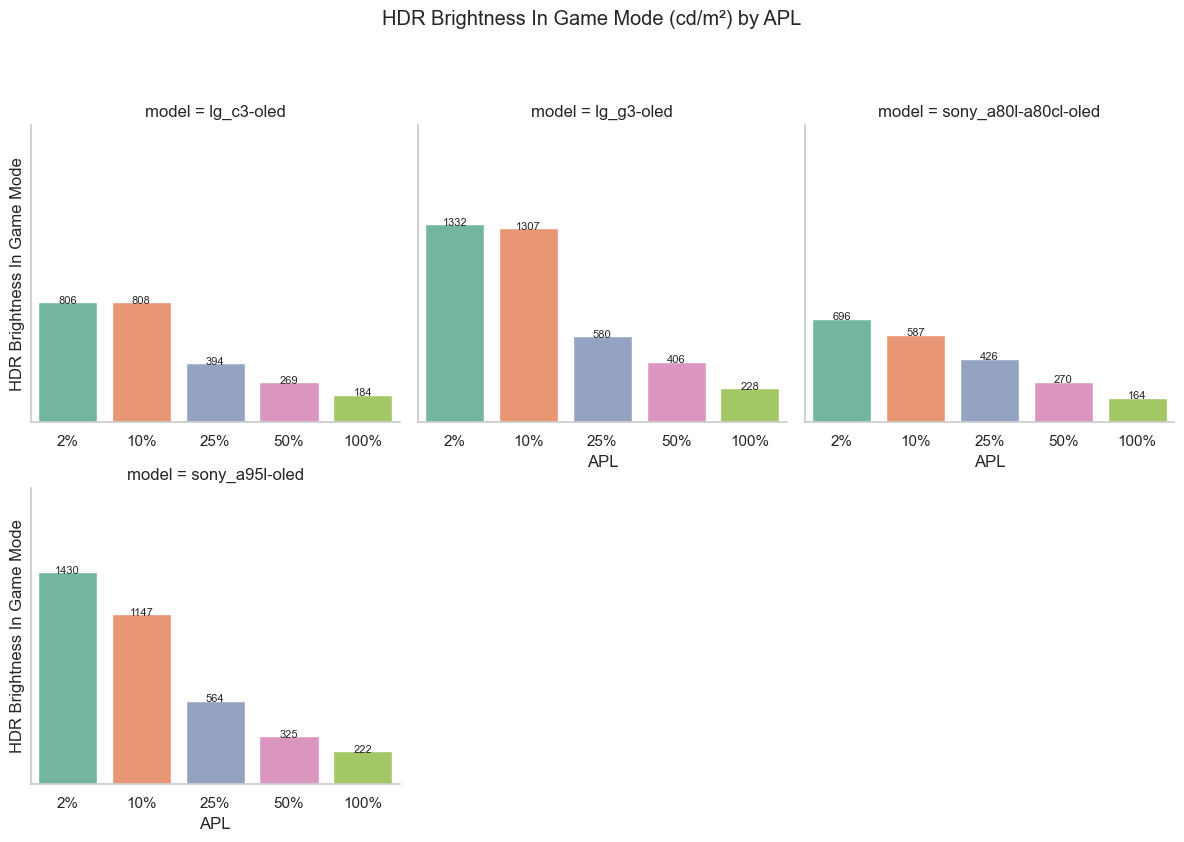

In [19]:
rvisualizer.plot_lines(target_col,yticks=yticks,ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### SDR Brightness (Peak)

In [20]:
target_col = 'SDR Brightness'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

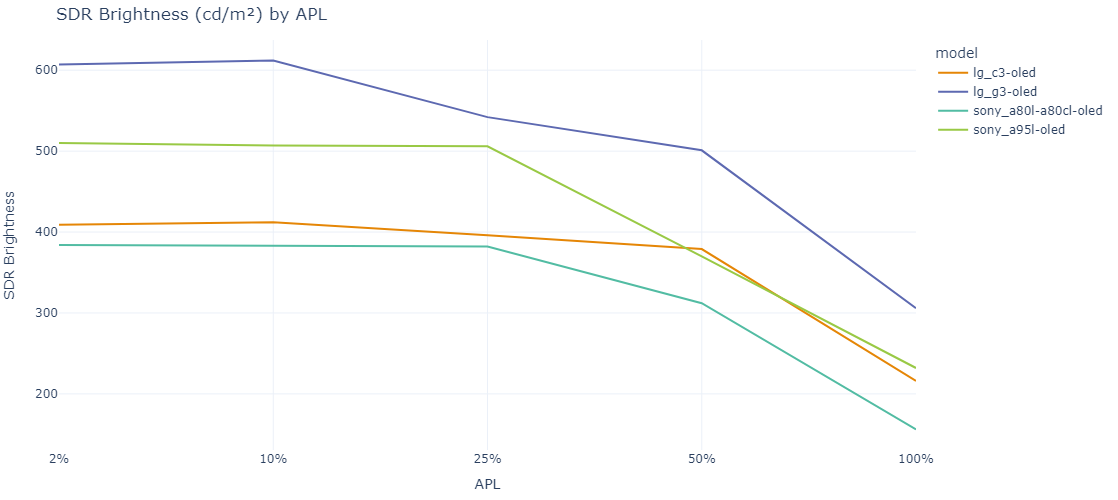

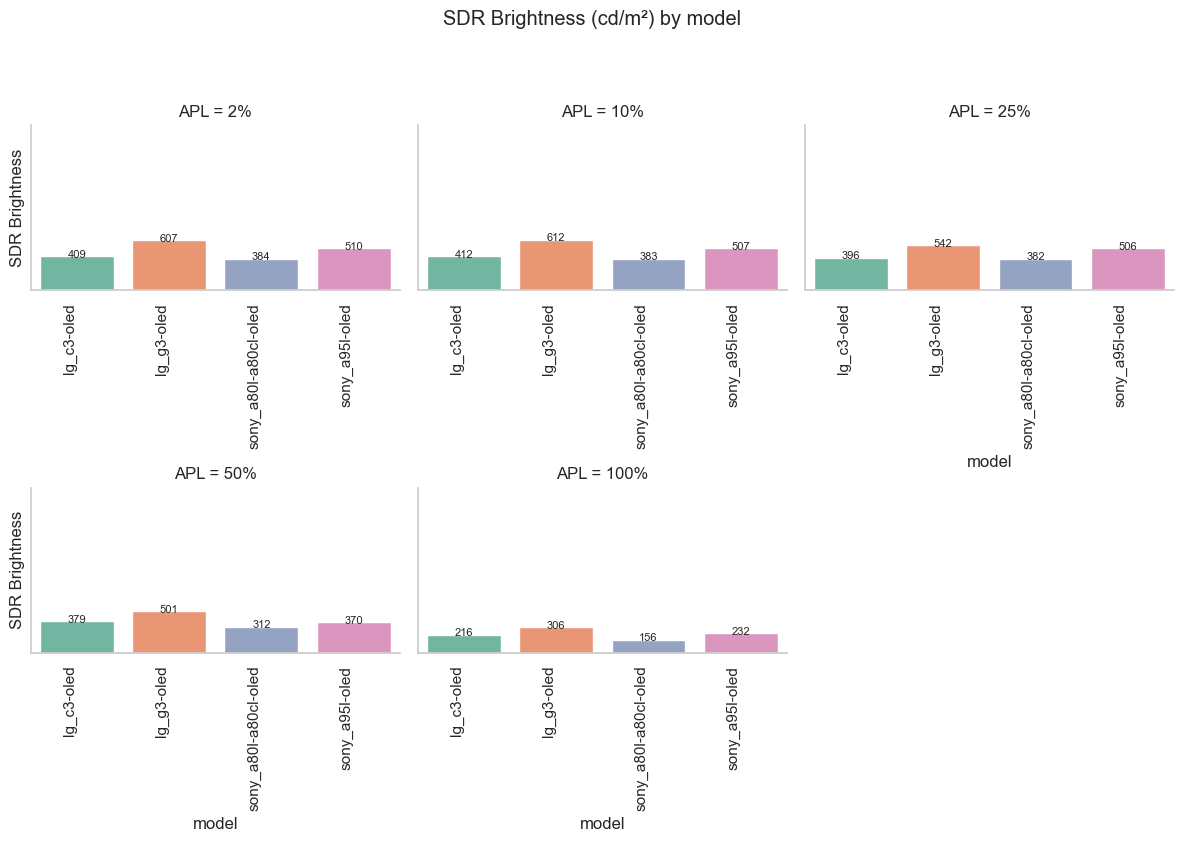

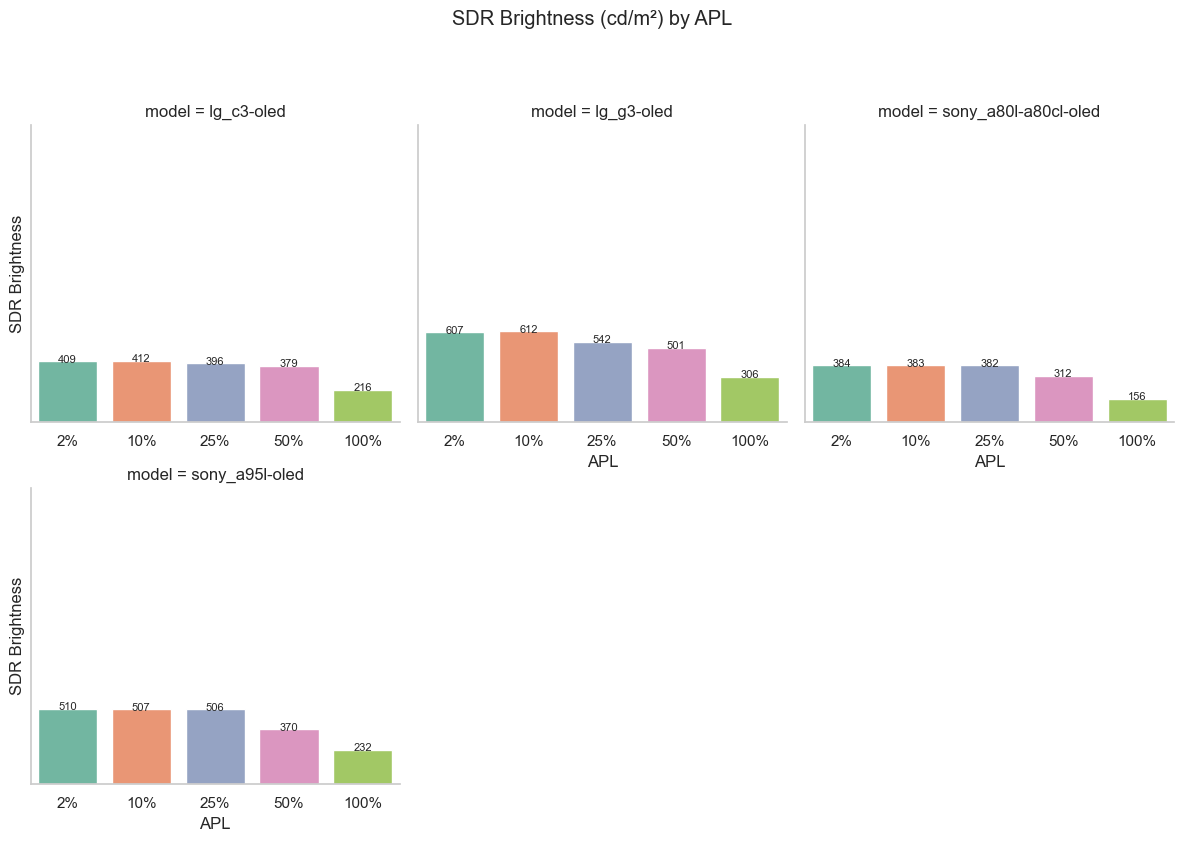

In [21]:
rvisualizer.plot_lines(target_col)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### Color Volume

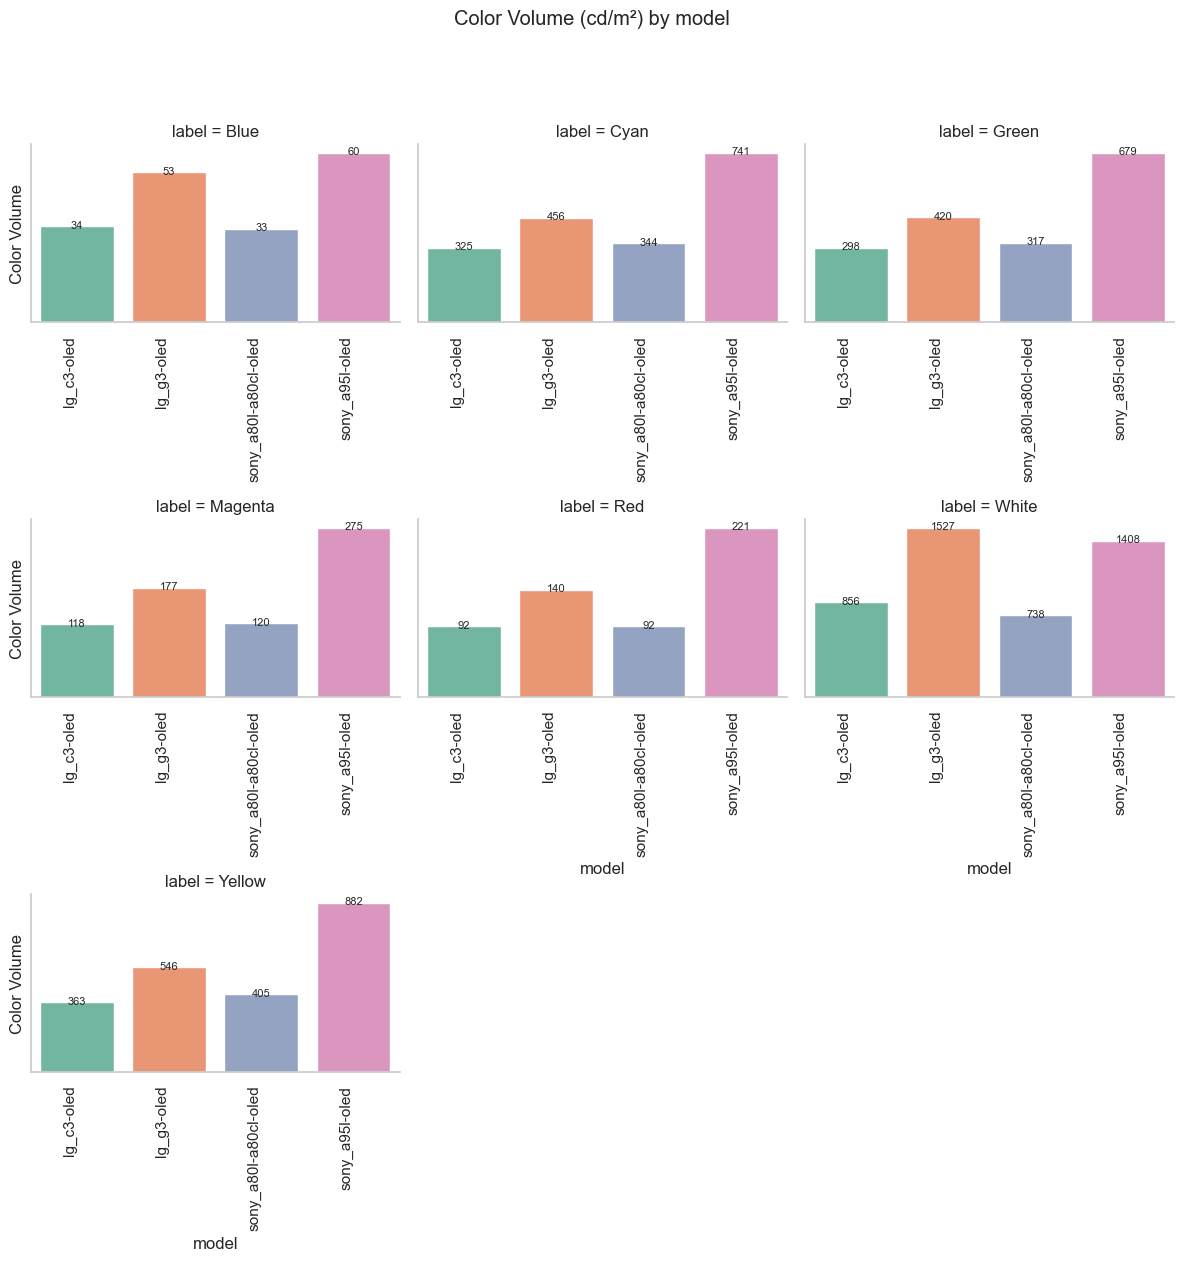

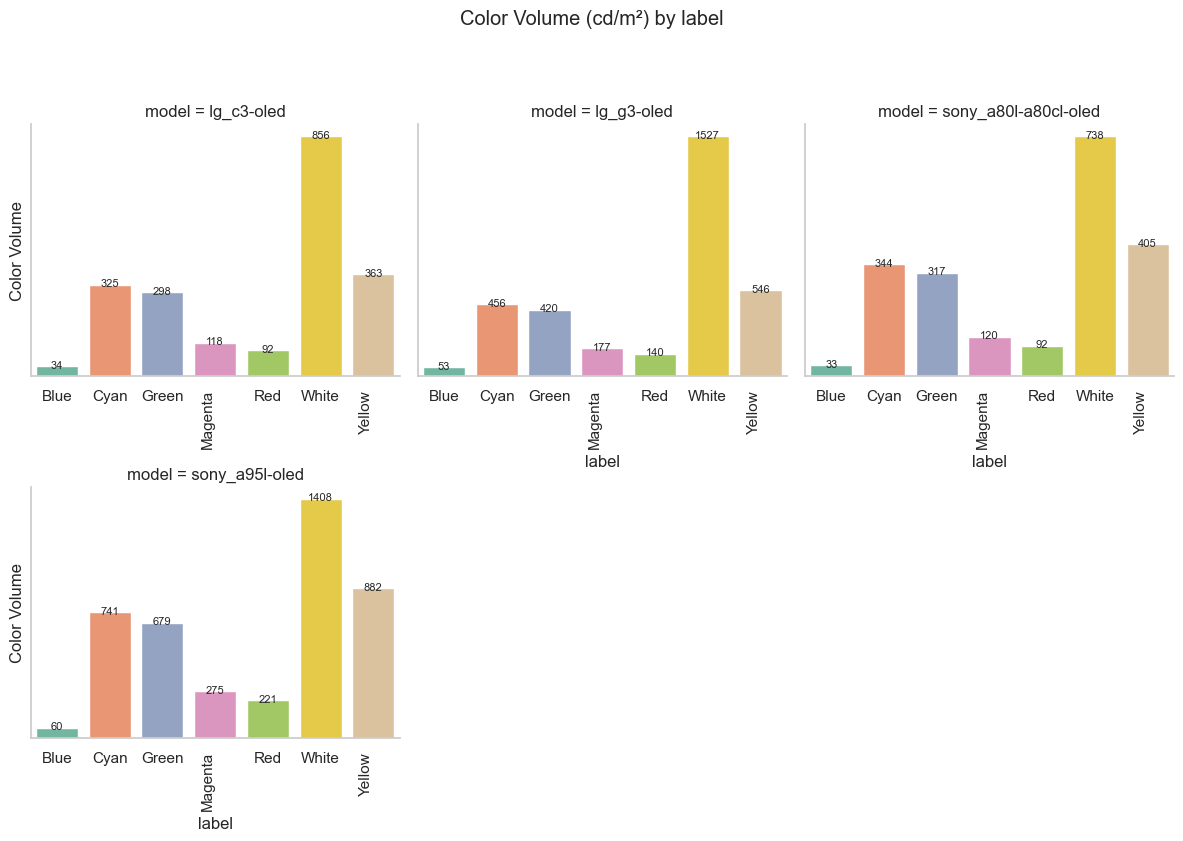

In [22]:
target_col = 'Color Volume'
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

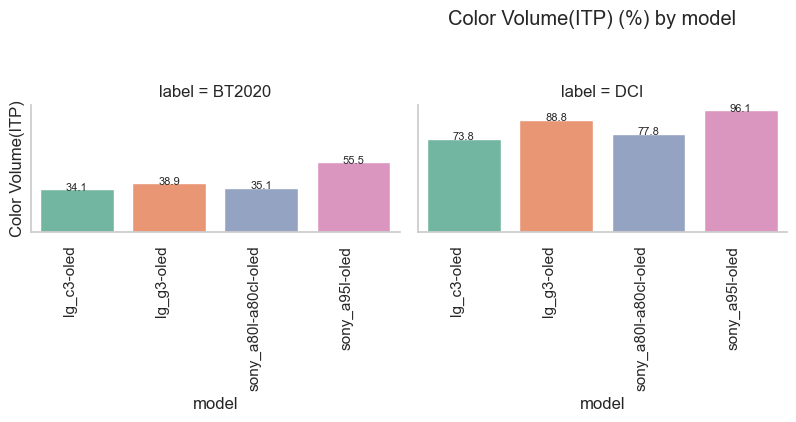

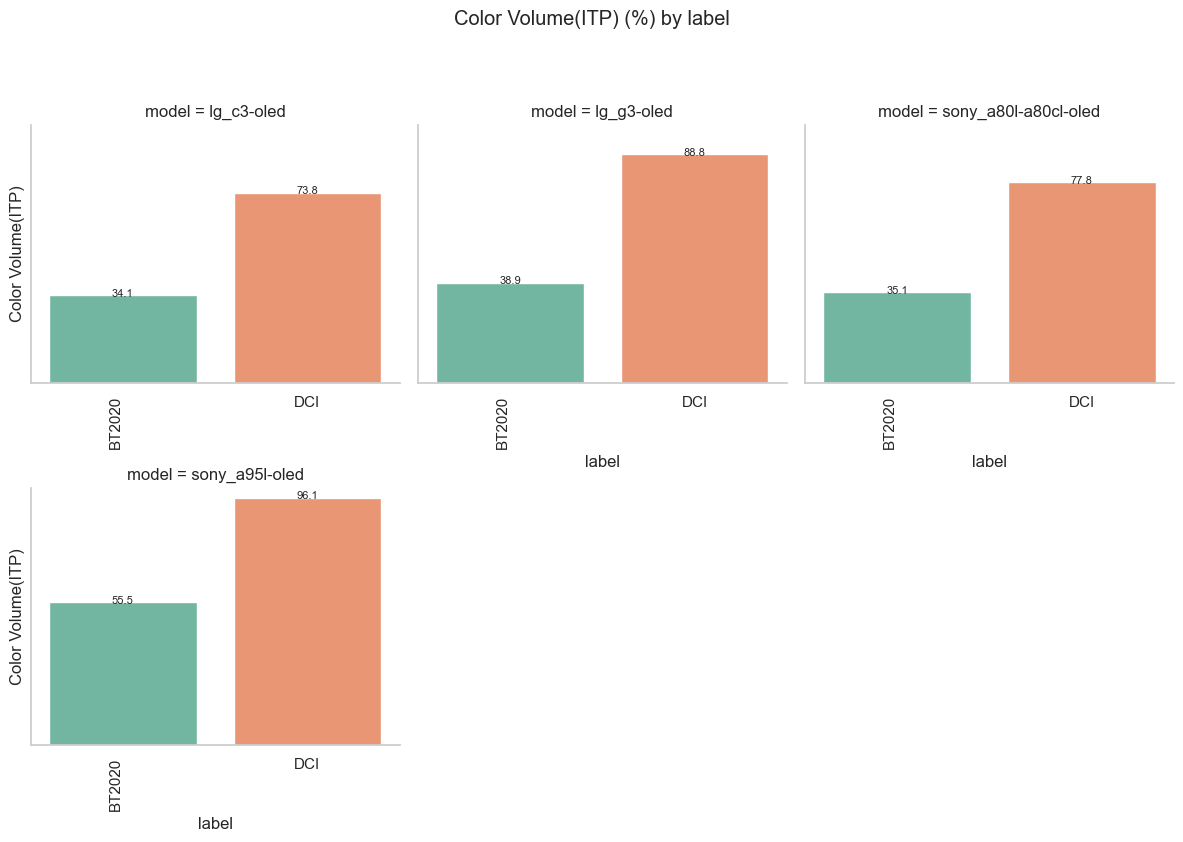

In [23]:
target_col = 'Color Volume(ITP)'
ylims = (0, 100)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Color Gamut

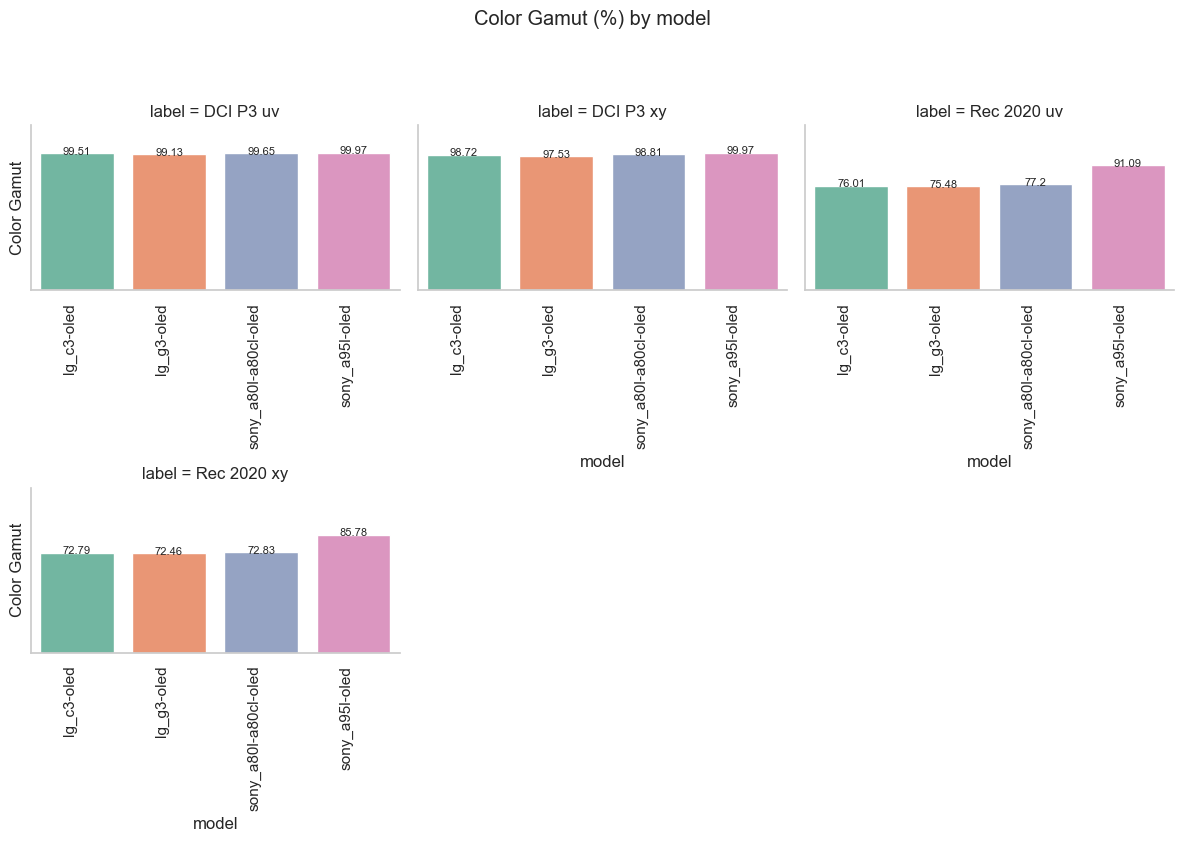

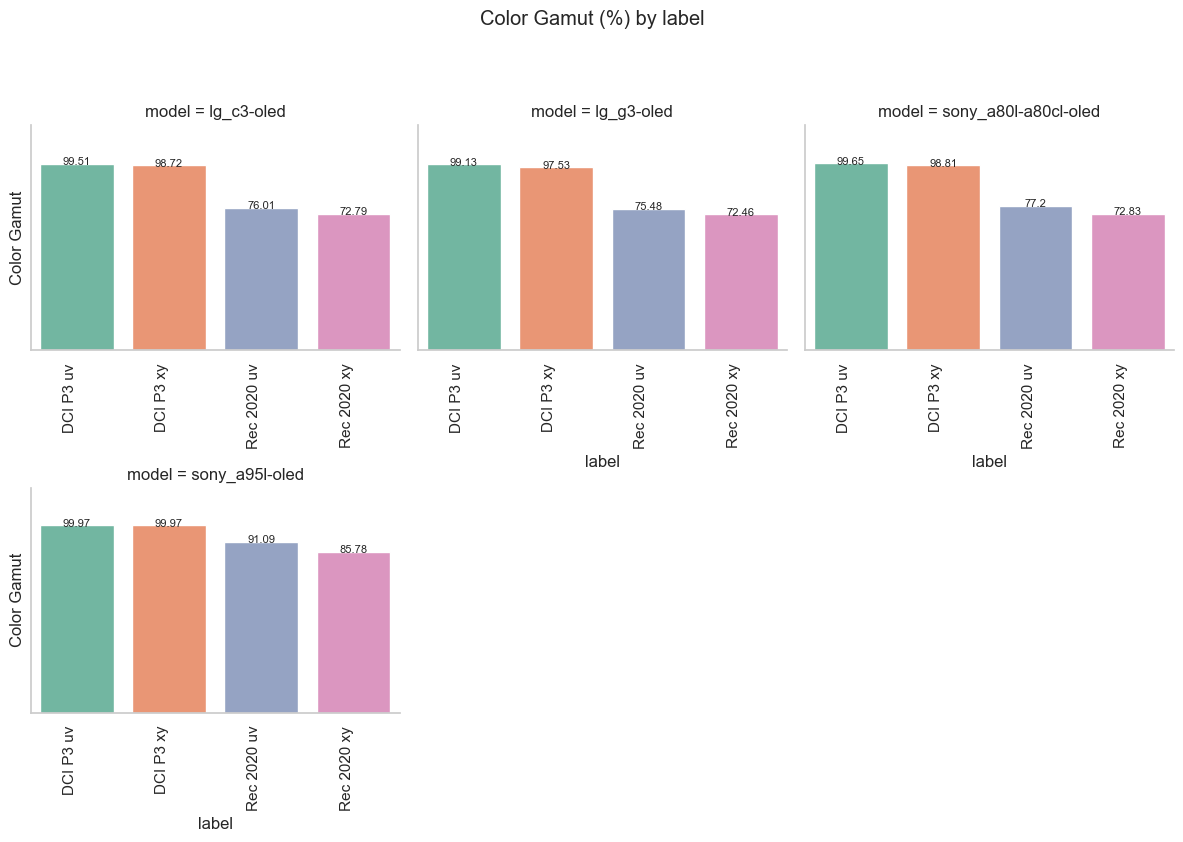

In [24]:
target_col = "Color Gamut"
ylims = (0, 120)
rvisualizer.plotsns_facet_bar(target_col,facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Viewing Angle

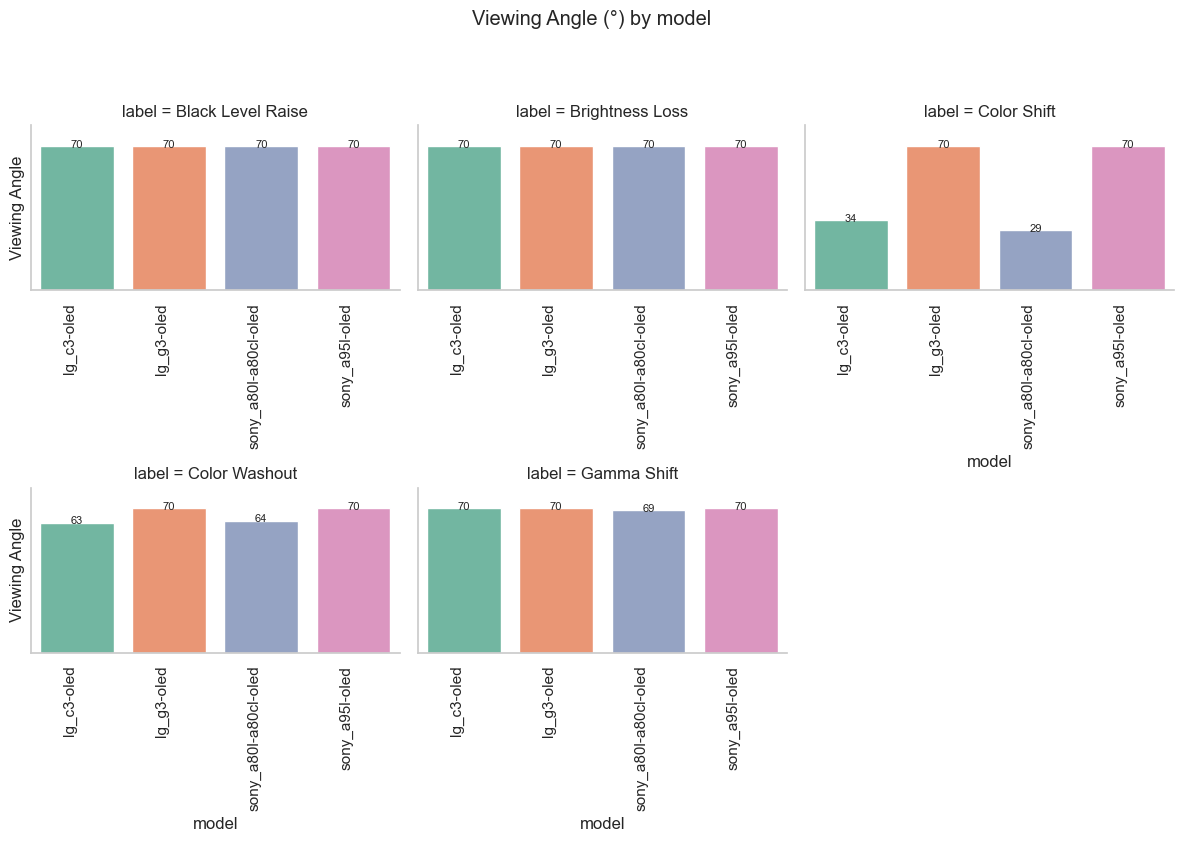

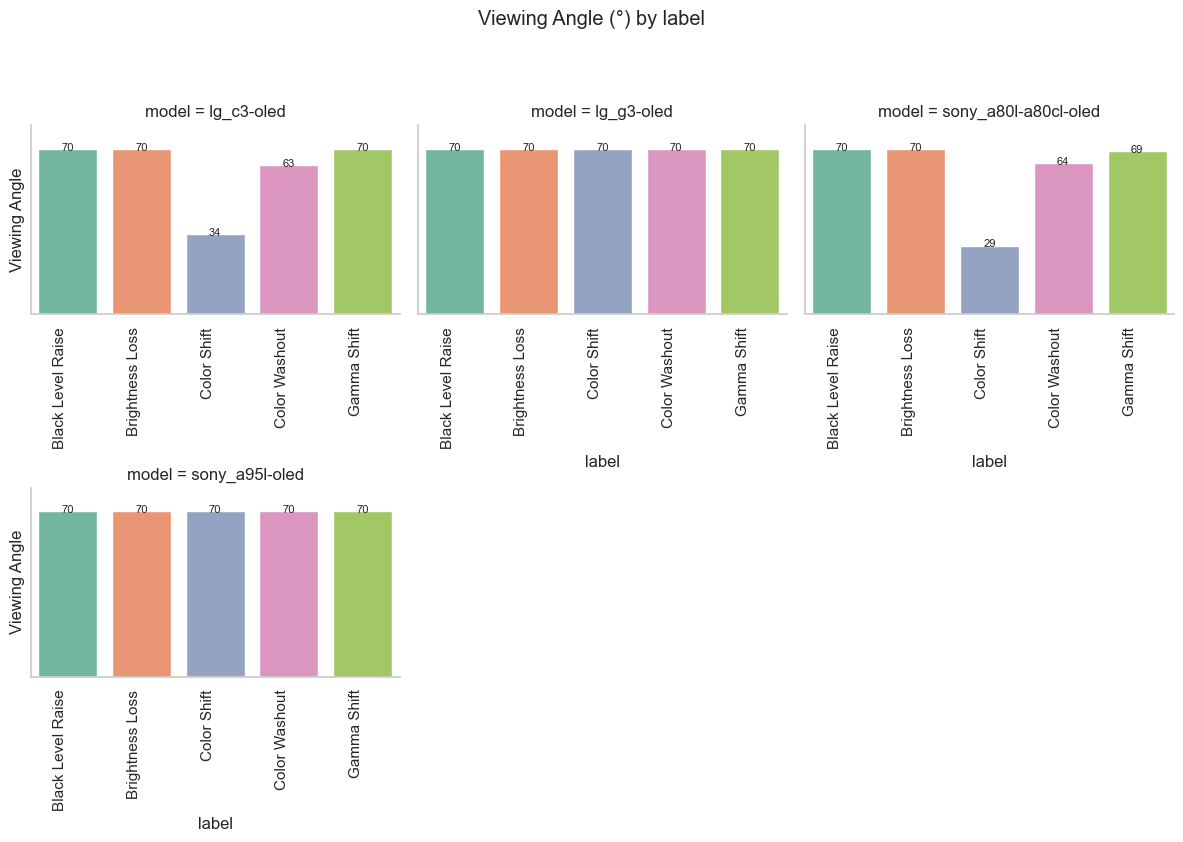

In [25]:
target_col = 'Viewing Angle'
ylims = (0, 80)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Contrast

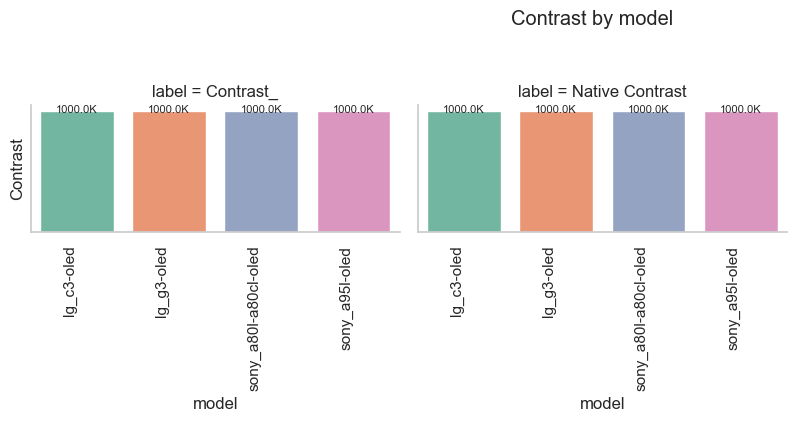

In [26]:
target_col = 'Contrast'
rvisualizer.plotsns_facet_bar(target_col)

### Pre Calibration

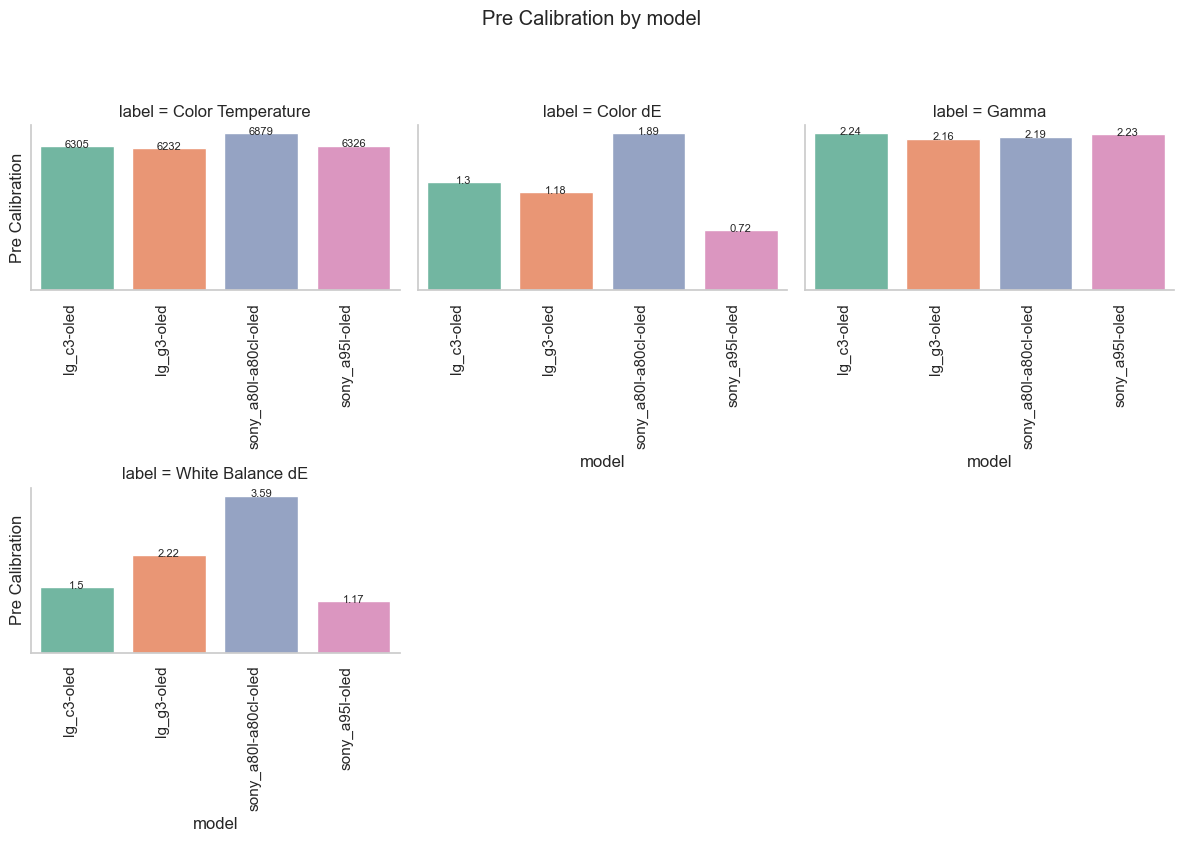

In [27]:
target_col = "Pre Calibration"
rvisualizer.plotsns_facet_bar(target_col)

### Post Calibration

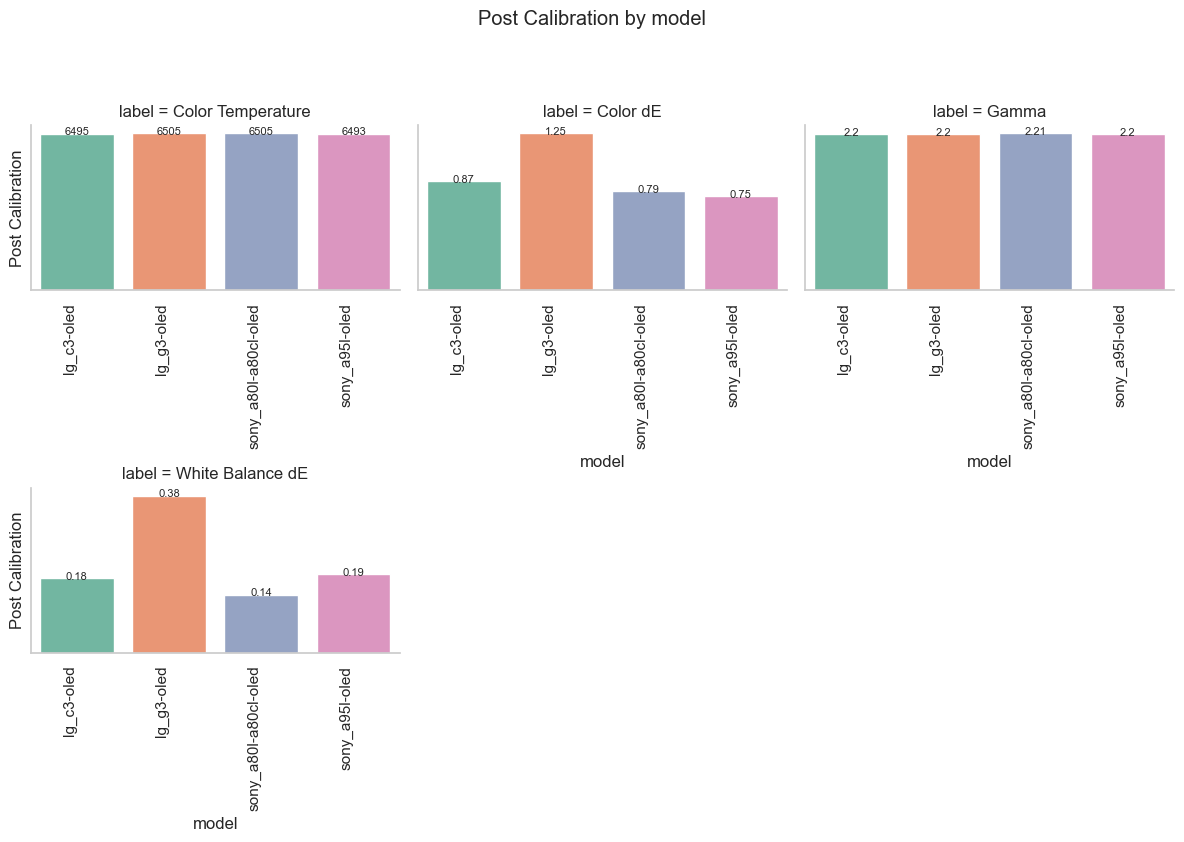

In [28]:
target_col = "Post Calibration"
rvisualizer.plotsns_facet_bar(target_col)

### PQ EOTF Tracking

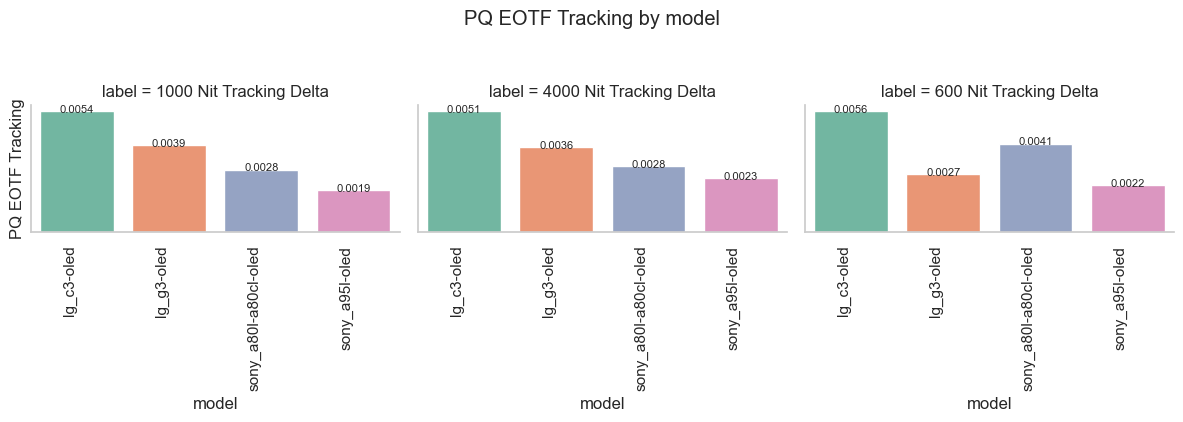

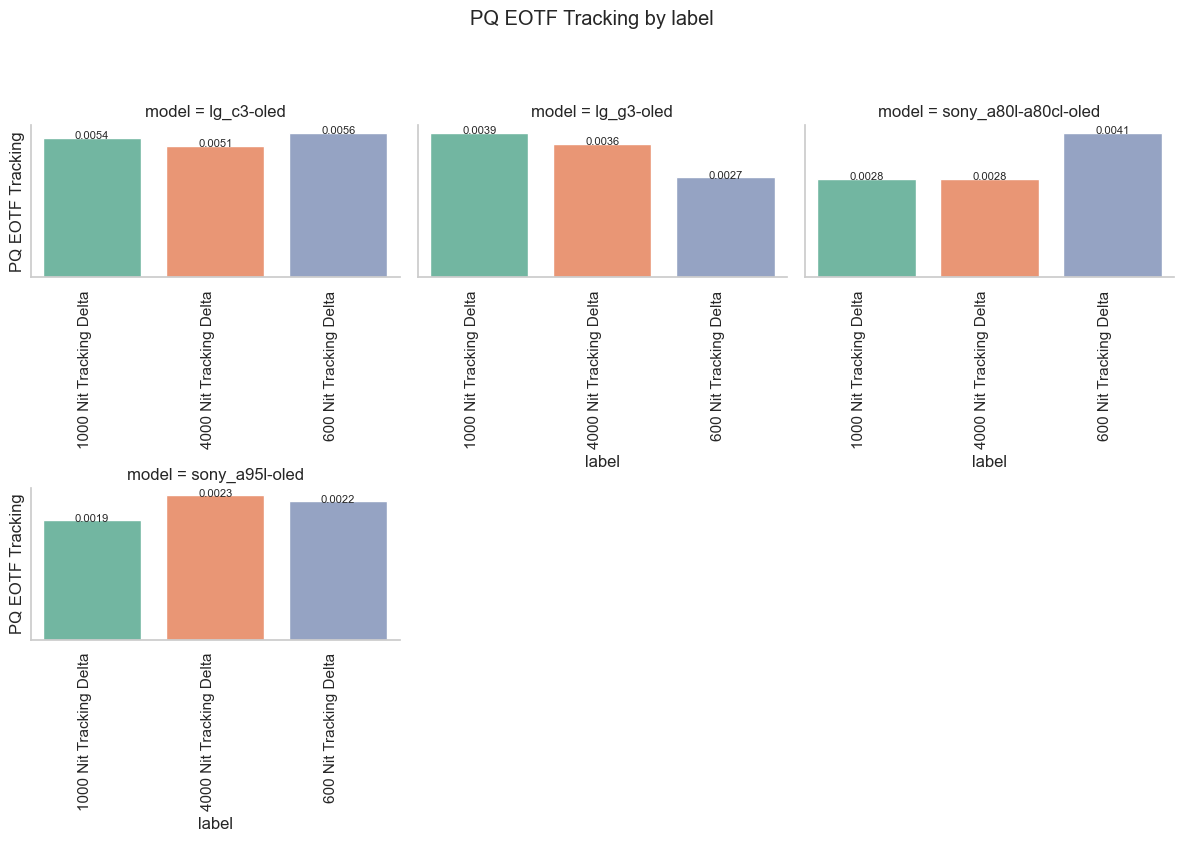

In [29]:
target_col = "PQ EOTF Tracking"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Reflections

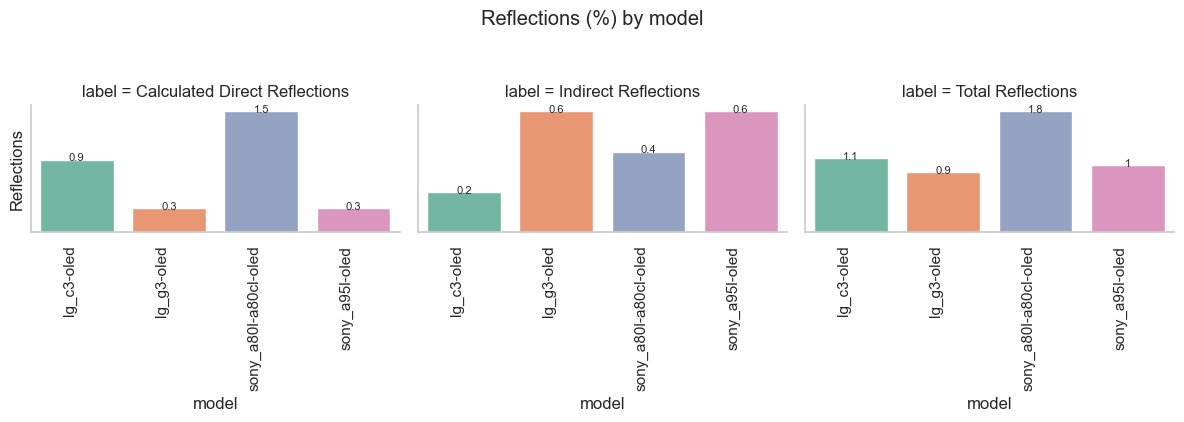

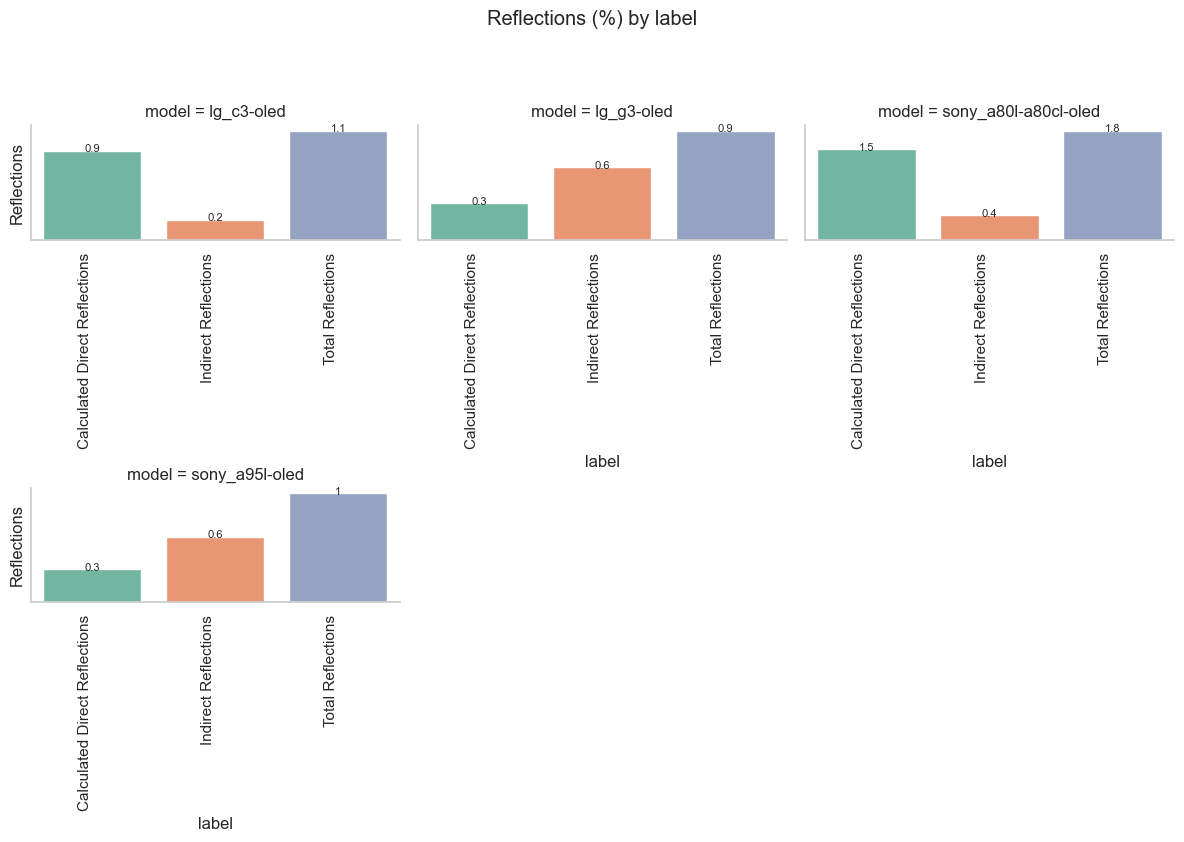

In [30]:
target_col = "Reflections"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### HDR Native Gradient

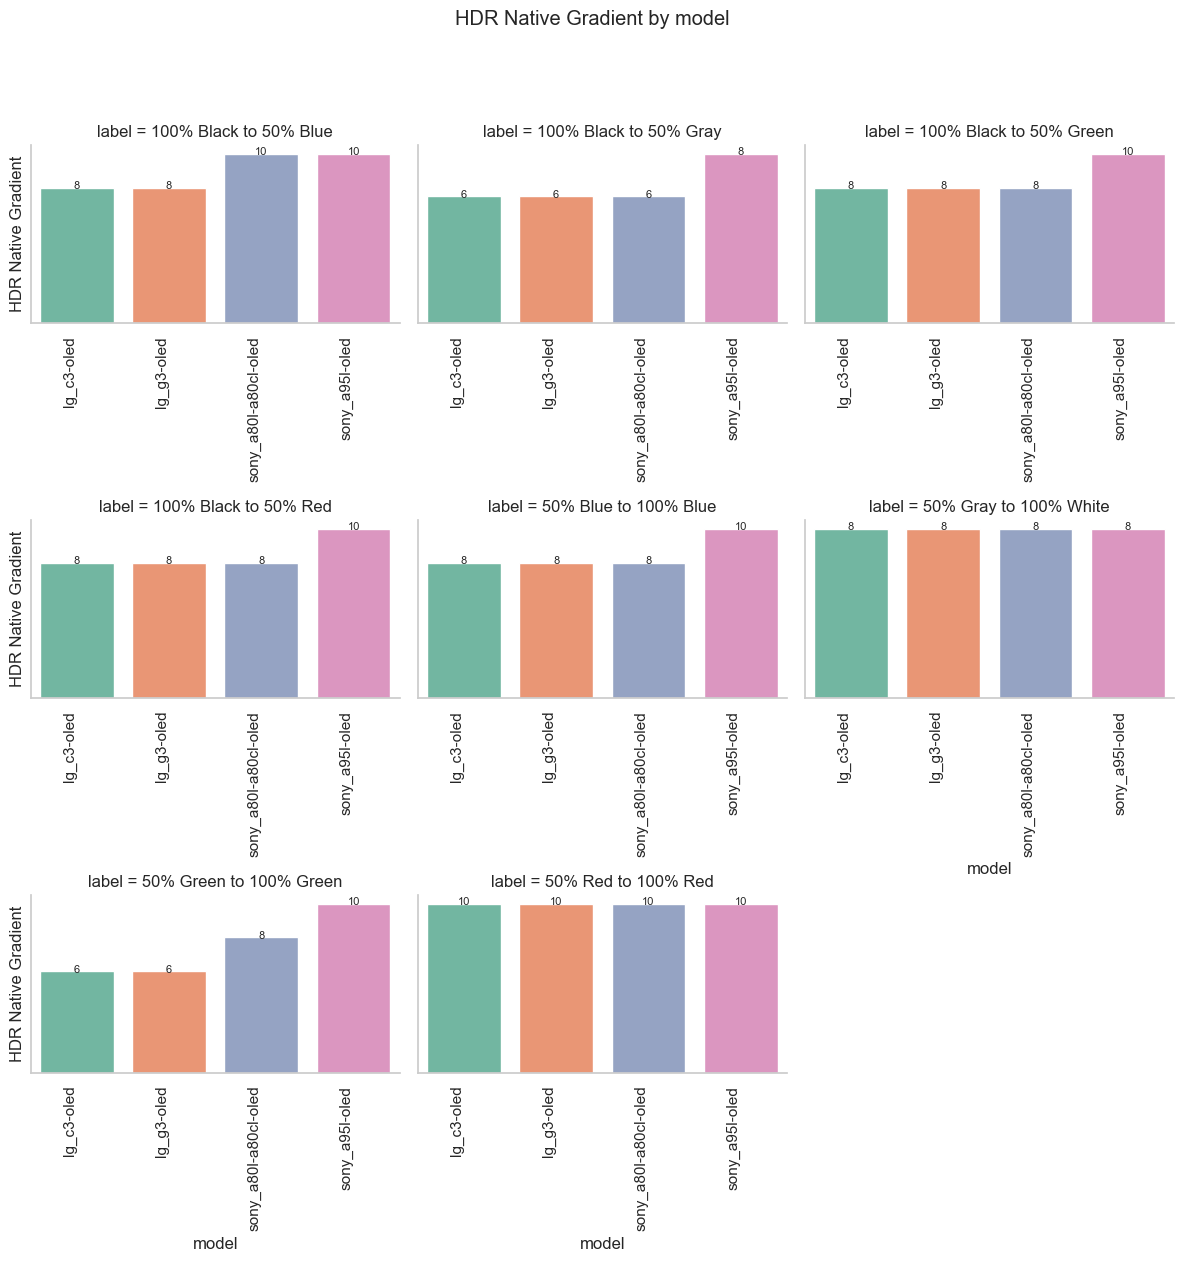

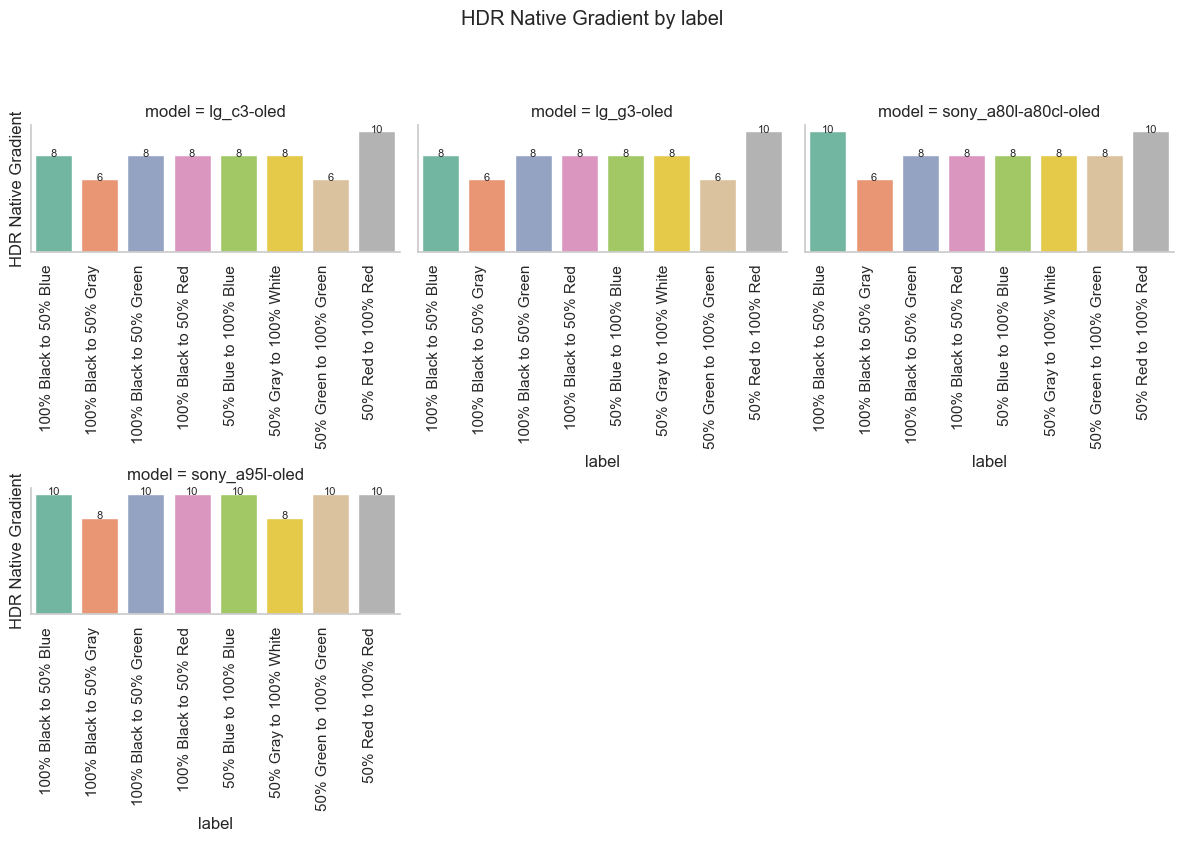

In [31]:
target_col = "HDR Native Gradient"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Low-Quality Content Smoothing

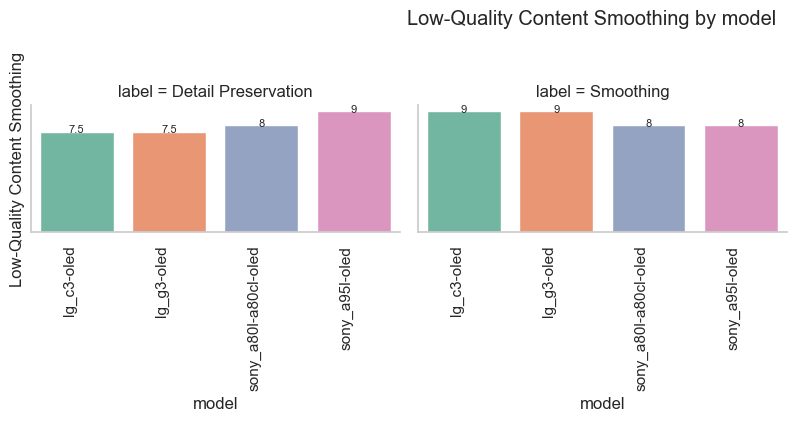

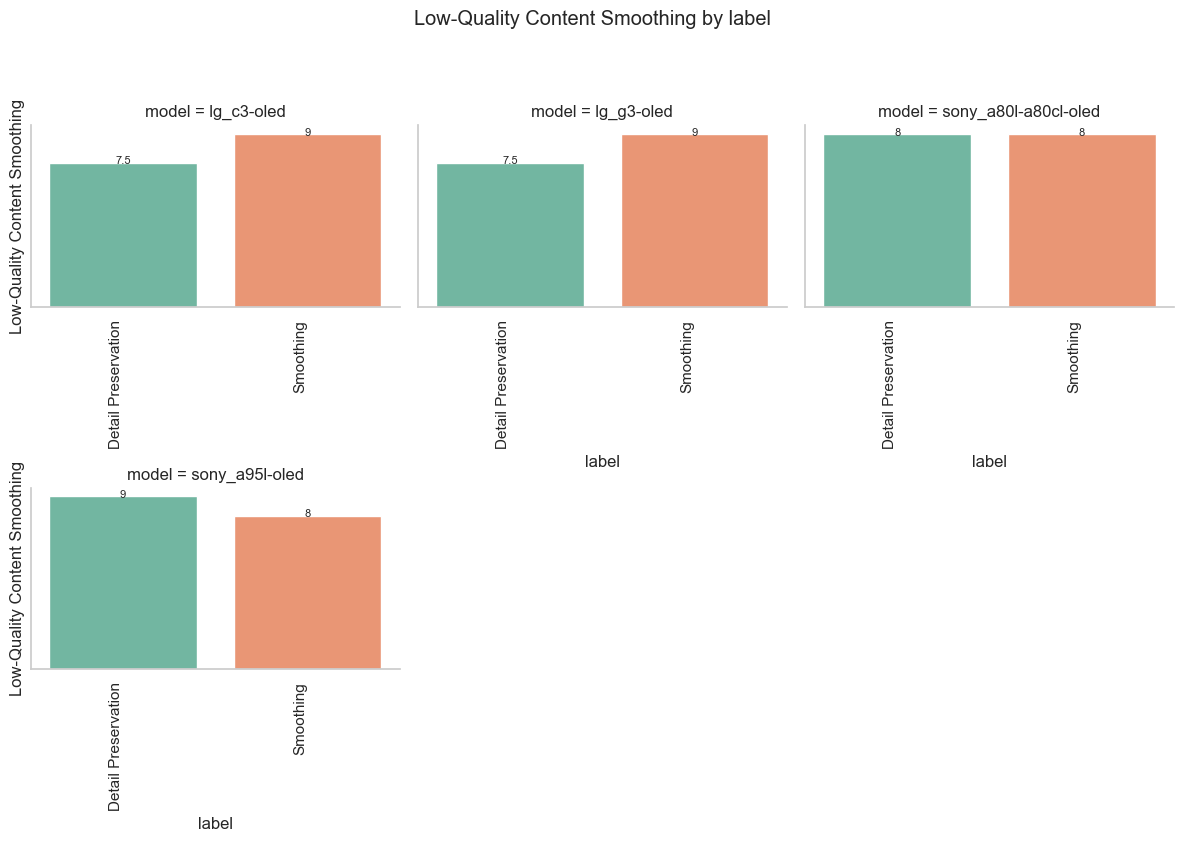

In [32]:
target_col = "Low-Quality Content Smoothing"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Gray Uniformity

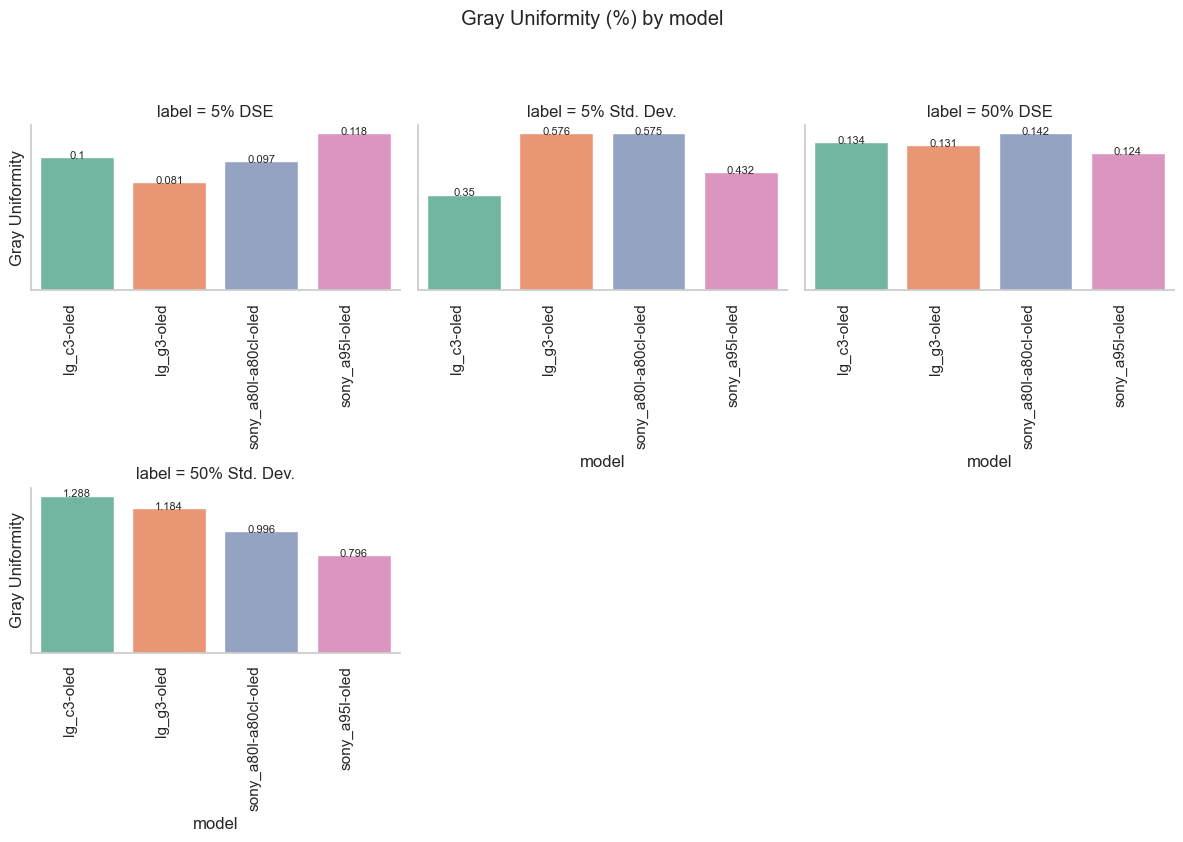

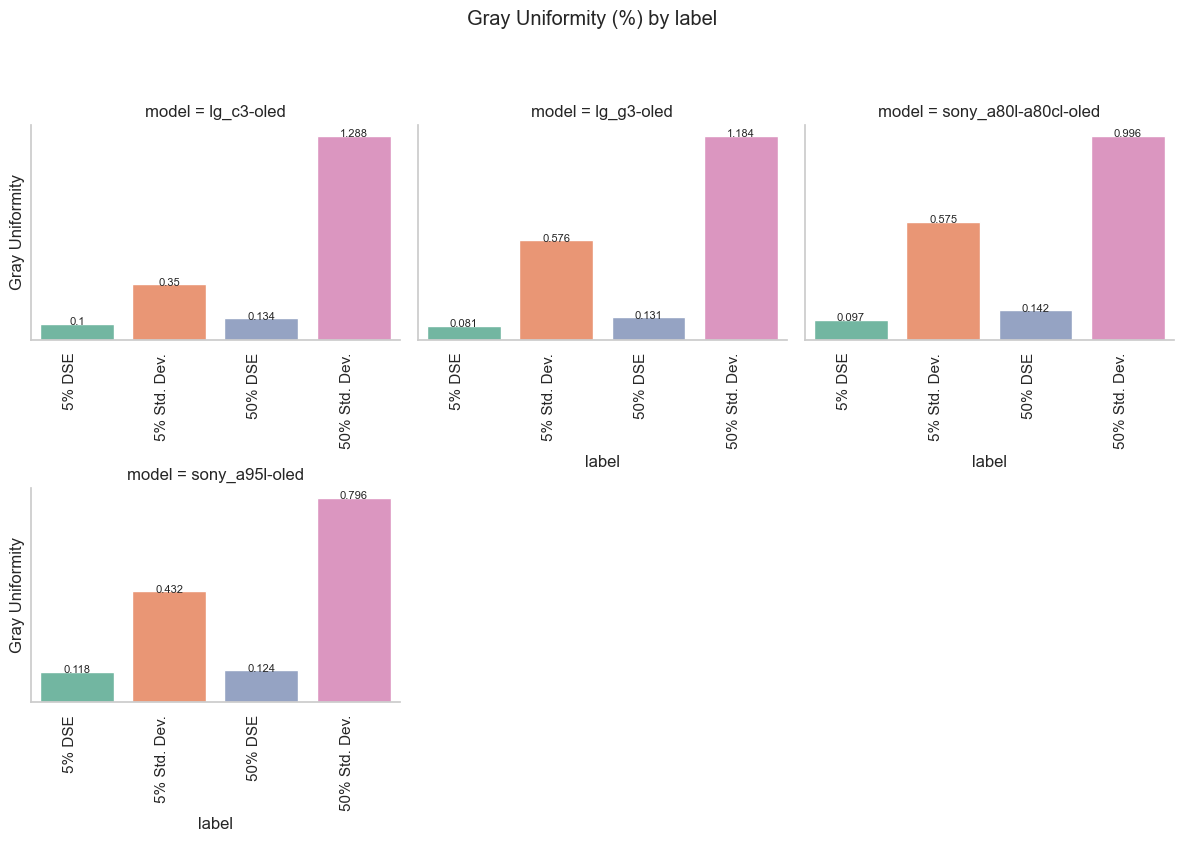

In [33]:
target_col = "Gray Uniformity"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Black Uniformity

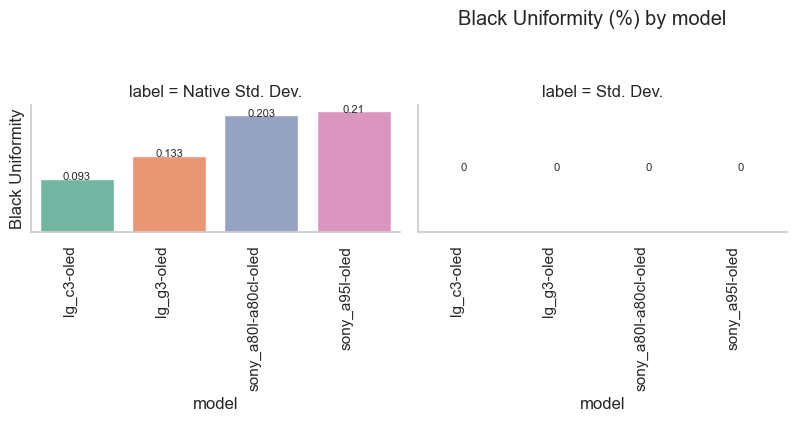

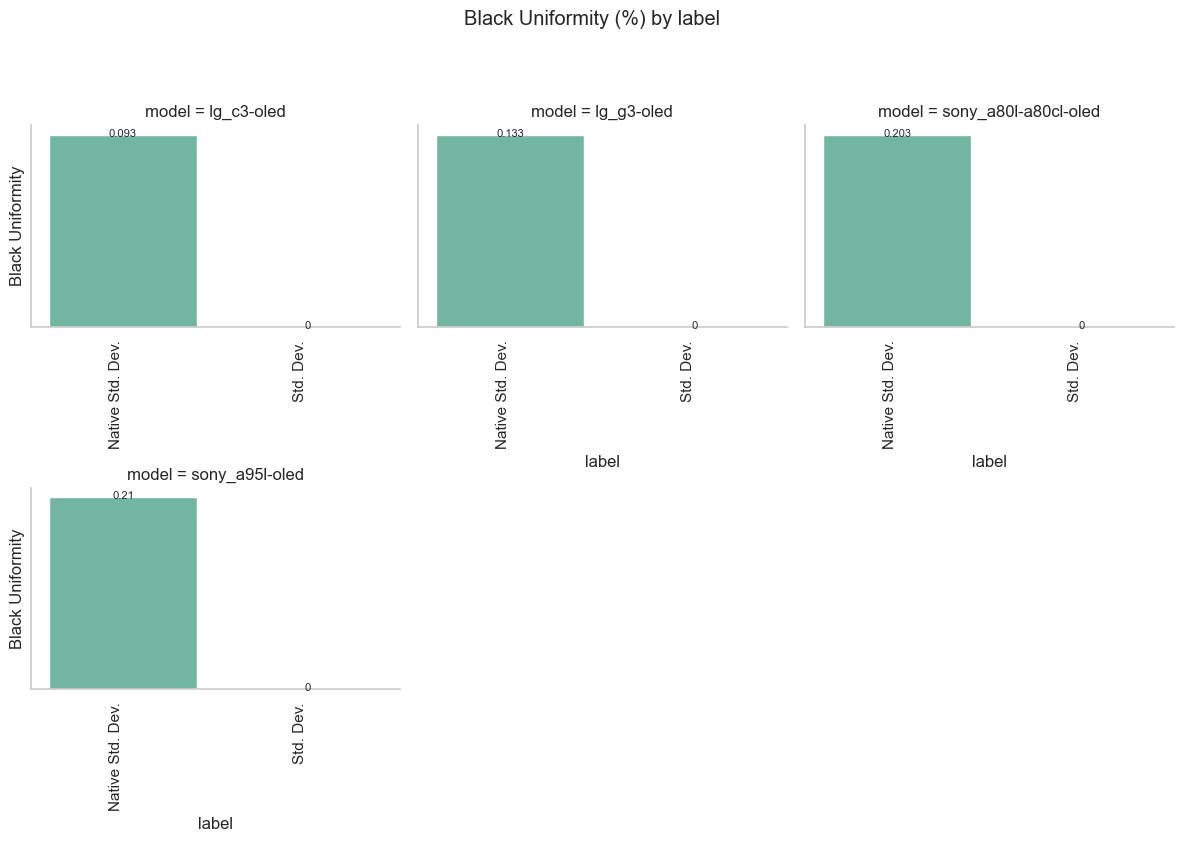

In [34]:
target_col = "Black Uniformity"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Response Time

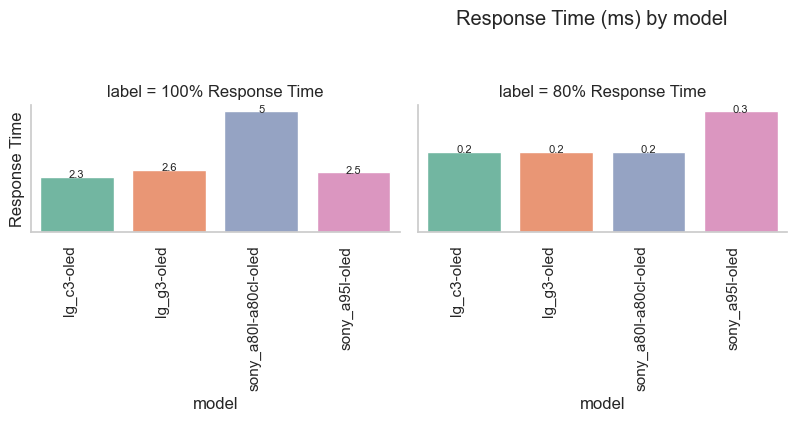

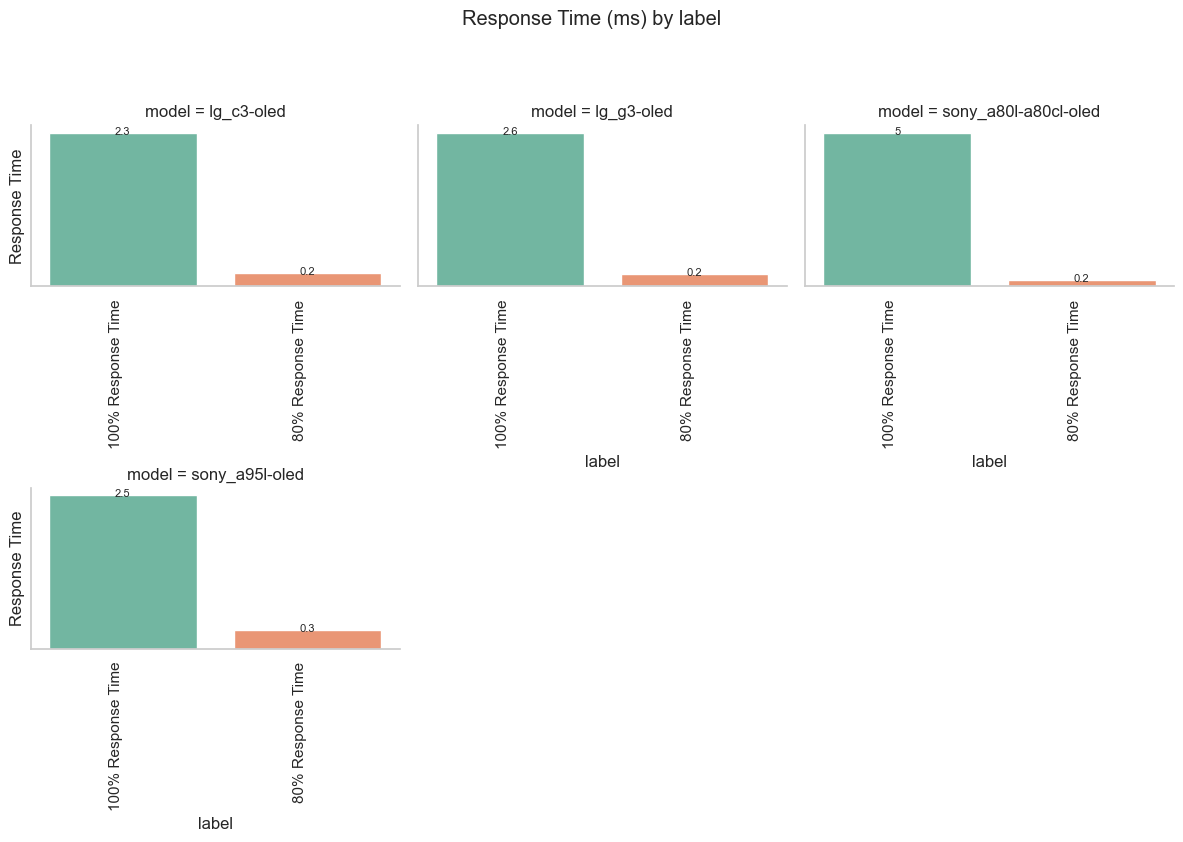

In [35]:
target_col = "Response Time"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Stutter

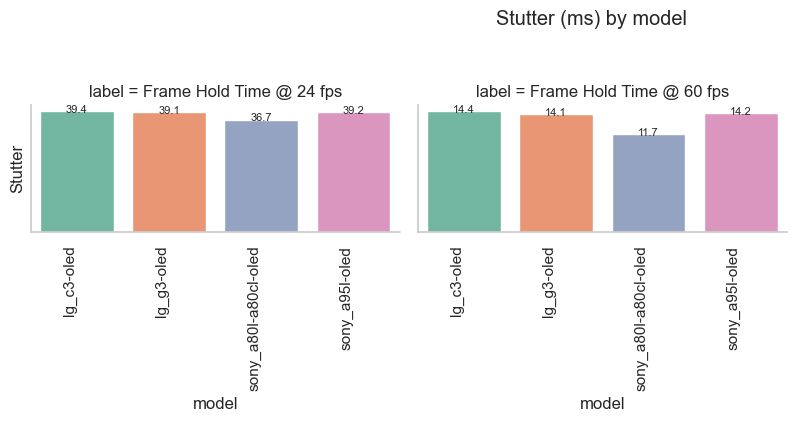

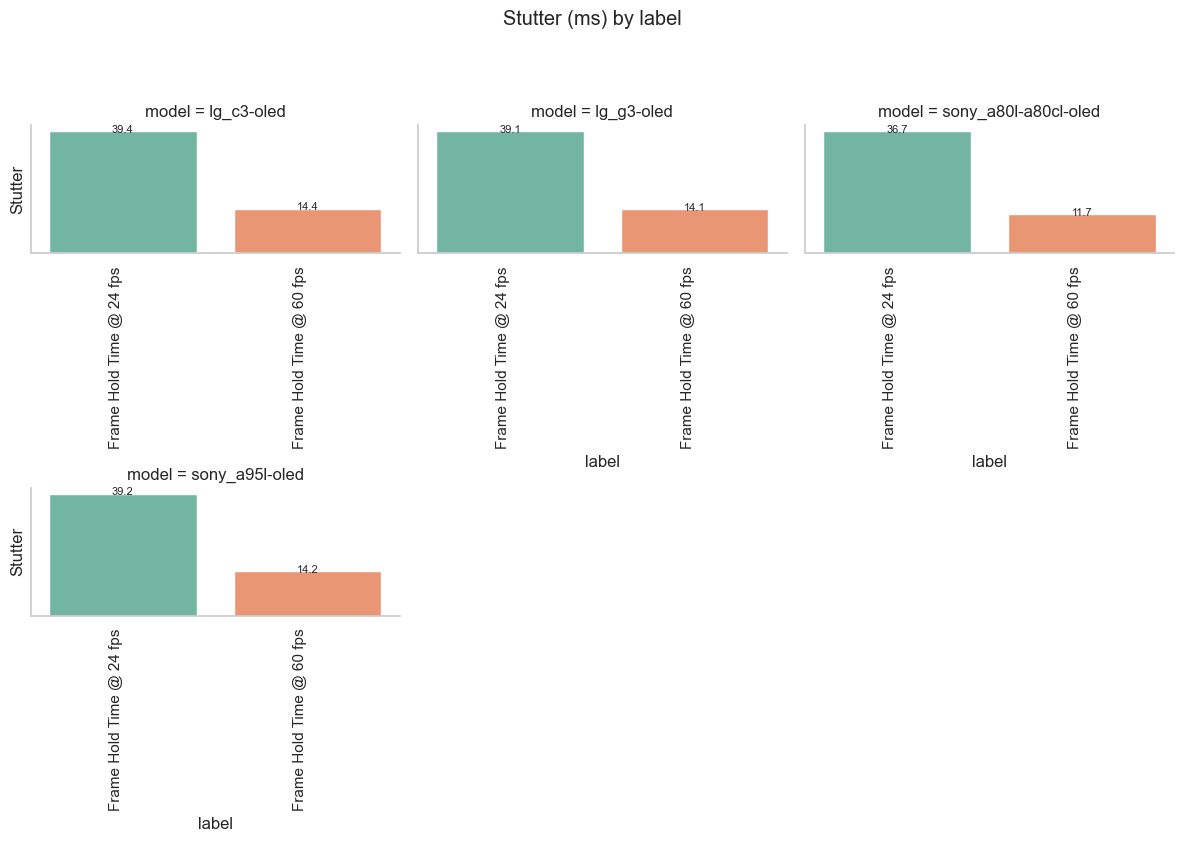

In [36]:
target_col = "Stutter"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Lighting Zone Transitions

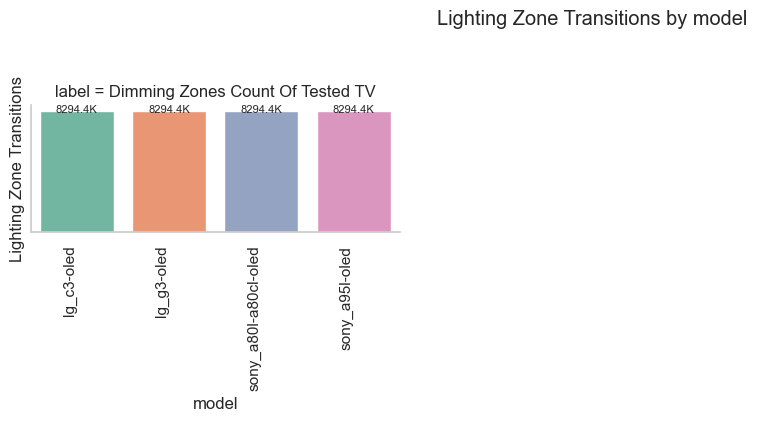

In [37]:
target_col = 'Lighting Zone Transitions'
rvisualizer.plotsns_facet_bar(target_col)

### Flicker-Free

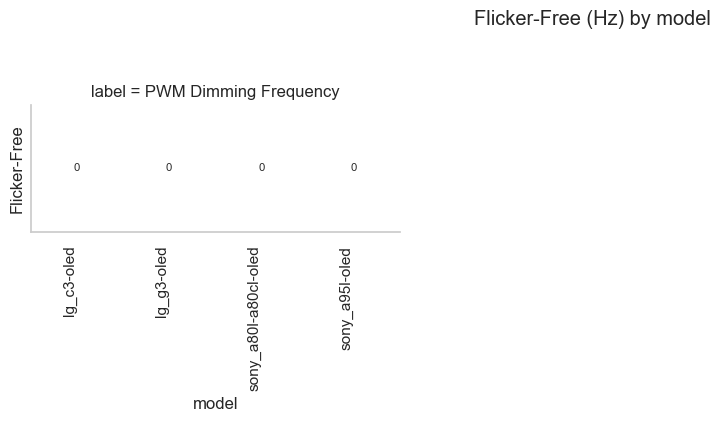

In [38]:
target_col = "Flicker-Free"
rvisualizer.plotsns_facet_bar(target_col)

### Variable Refresh Rate

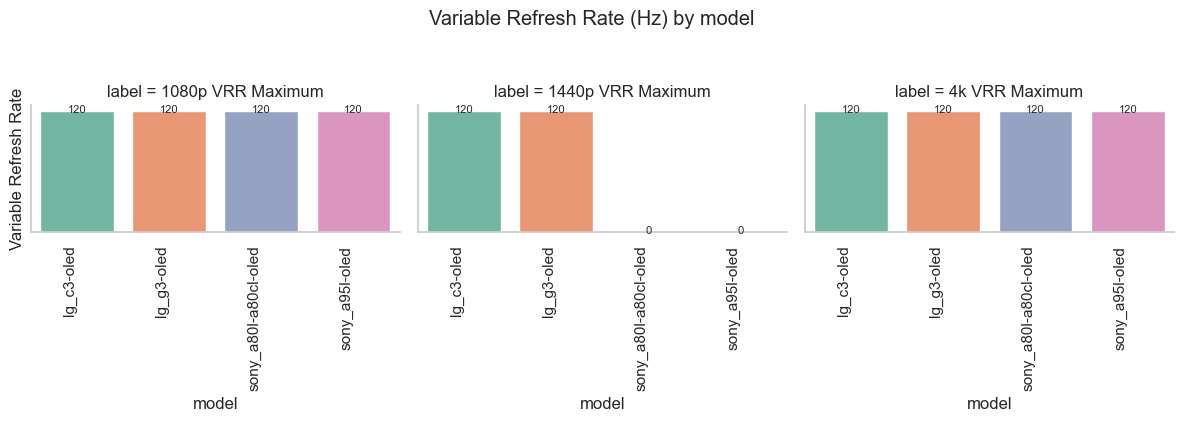

In [39]:
target_col = "Variable Refresh Rate"
rvisualizer.plotsns_facet_bar(target_col)

# colab에서 파일 받기

In [1]:
from google.colab import files
!zip -r /content/results.zip /content/results
files.download('/content/results.zip')

---